In [2]:
%matplotlib inline

from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [14]:
filename_3fgl = 'gll_psc_v16.fit'
hdul_3fgl = fits.open(filename_3fgl)
hdul_3fgl[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1082 / length of dimension 1                          
NAXIS2  =                 3034 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   77 / number of table fields                         
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [4]:
energy_bins = [100,300,1000,3000,10000,100000]
flux = np.zeros(len(hdul_3fgl[1].data['Flux1000']))
for i in range(len(energy_bins)-1):
    flux += np.array(hdul_3fgl[1].data['Flux'+str(energy_bins[i])+'_'+str(energy_bins[i+1])])

-9.993820290471286


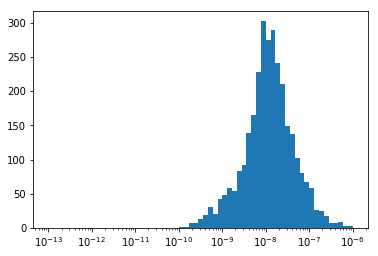

In [5]:
print(np.log10(min(flux)))
bins = plt.hist(flux, bins=np.logspace(-13, -6, 8*8 ));
plt.xscale("log")

7.742636826811278e-09


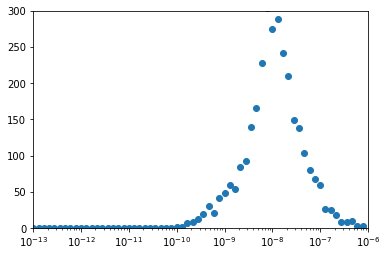

In [18]:
F = bins[1][:-1]
dN = bins[0]
dF = np.diff(bins[1])
plt.scatter(F, dN)
#plt.yscale("log")
plt.xscale("log")
plt.ylim(0, 300)
plt.xlim(1e-13, 1e-6)
print(F[np.argmax(dN)])